### Lab-02: Linear regression

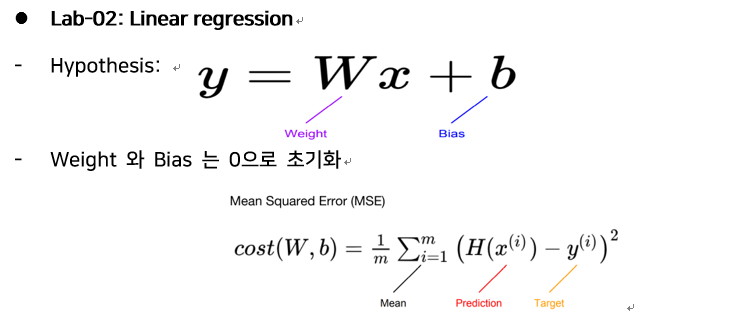

In [ ]:
import torch
import torch.optim as optim

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[4], [5], [6]])

W = torch.zeros(1, requires_grad=True) # 학습할 것이라고 명시
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient descent
optimizer = optim.SGD([W, b], lr=0.01)
# [W, b] 는 학습할 tensor 들

# 항상 붙어다니는 3줄
optimizer.zero_grad() # gradient 초기화
cost.backward() # gradient 계산
optimizer.step() # 개선

< 한번만 >
- 데이터 정의 + Hypothesis 초기화 + Optimizer 정의

< 반복 >
- Hypothesis 예측 + Cost 계산 + Optimizer로 학습 

In [ ]:
## Full training code

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[4], [5], [6]])

W = torch.zeros(1, requires_grad=True) # 학습할 것이라고 명시
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
  hypothesis = x_train * W + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad() # gradient 초기화
  cost.backward() # gradient 계산
  optimizer.step() # 개선

### Lab-03: Deeper Look at GD

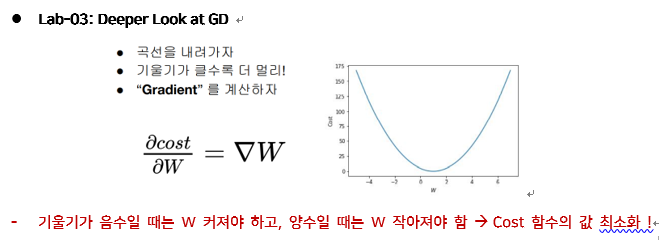

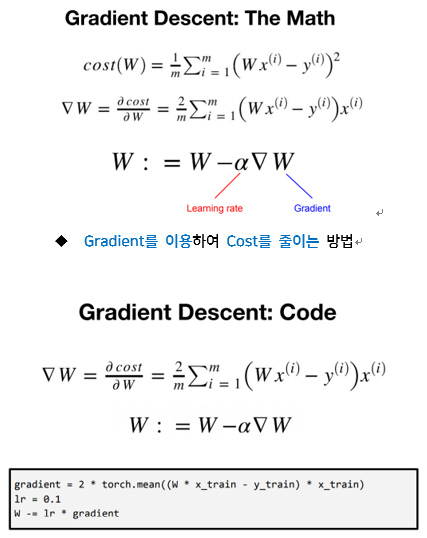

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[4], [5], [6]])
# 모델 초기화
W = torch.zeros(1)
# Learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W

  # cost gradient 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
  gradient = torch.sum((W * x_train - y_train) * x_train)

  print('Epoch {:4d}/{} w: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))

  # cost gradient로 H(x) 개선
  W -= lr * gradient

# 1에 수렴하는 W + 줄어드는 cost

Epoch    0/10 w: 0.000, Cost: 25.666666
Epoch    1/10 w: 3.200, Cost: 5.186668
Epoch    2/10 w: 1.920, Cost: 1.909867
Epoch    3/10 w: 2.432, Cost: 1.385579
Epoch    4/10 w: 2.227, Cost: 1.301692
Epoch    5/10 w: 2.309, Cost: 1.288271
Epoch    6/10 w: 2.276, Cost: 1.286123
Epoch    7/10 w: 2.289, Cost: 1.285780
Epoch    8/10 w: 2.284, Cost: 1.285725
Epoch    9/10 w: 2.286, Cost: 1.285716
Epoch   10/10 w: 2.285, Cost: 1.285715


In [ ]:
## Full Code with torch.optim

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[4], [5], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

Epoch    0/10 W: 0.000, Cost: 25.666666
Epoch    1/10 W: 3.200, Cost: 5.186668
Epoch    2/10 W: 1.920, Cost: 1.909866
Epoch    3/10 W: 2.432, Cost: 1.385579
Epoch    4/10 W: 2.227, Cost: 1.301692
Epoch    5/10 W: 2.309, Cost: 1.288271
Epoch    6/10 W: 2.276, Cost: 1.286123
Epoch    7/10 W: 2.289, Cost: 1.285780
Epoch    8/10 W: 2.284, Cost: 1.285725
Epoch    9/10 W: 2.286, Cost: 1.285716
Epoch   10/10 W: 2.285, Cost: 1.285715
